In [1]:
import requests
import pandas as pd 
import matplotlib as plot 
from pathlib import Path
from sqlalchemy import create_engine,text
import matplotlib.pyplot as plt
import os 
import seaborn as sns



In [2]:
# Create a reference path to the file
database_path = Path("Resources/APYIndia.sqlite")


In [3]:
# Create Engine
engine = create_engine(f"sqlite:///{database_path}")

In [4]:
# Query All Records in the the Database
query = text("SELECT * FROM APYIndia")
with engine.connect() as conn:
    apy_india = conn.execute(query)
    

In [5]:
apy_india_df=pd.DataFrame(apy_india)
apy_india_df.head()

,ID,State,District,Crop,Crop_Year,Season,Area,Production,Yield
0,1,Andaman and Nicobar Island,NICOBARS,Arecanut,2007,Kharif,2439.6,3415.0,1.40
1,2,Andaman and Nicobar Island,NICOBARS,Arecanut,2007,Rabi,1626.4,2277.0,1.40
2,3,Andaman and Nicobar Island,NICOBARS,Arecanut,2008,Autumn,4147.0,3060.0,0.74
3,4,Andaman and Nicobar Island,NICOBARS,Arecanut,2008,Summer,4147.0,2660.0,0.64
4,5,Andaman and Nicobar Island,NICOBARS,Arecanut,2009,Autumn,4153.0,3120.0,0.75


In [6]:
# Drop the rows which has empty columns
apy_india_df = apy_india_df.dropna()

In [7]:
# Retrieve unique crops
unique_crops = apy_india_df['Crop'].unique()
print(unique_crops)

['Arecanut' 'Arhar/Tur' 'Banana' 'Black pepper' 'Cashewnut' 'Coconut '
 'Cowpea(Lobia)' 'Dry chillies' 'Ginger' 'Groundnut' 'Maize'
 'Moong(Green Gram)' 'Oilseeds total' 'Other Kharif pulses'
 'other oilseeds' 'Rapeseed &Mustard' 'Rice' 'Sesamum' 'Sugarcane'
 'Sunflower' 'Sweet potato' 'Tapioca' 'Turmeric' 'Urad' 'Bajra'
 'Castor seed' 'Coriander' 'Cotton(lint)' 'Garlic' 'Gram' 'Guar seed'
 'Horse-gram' 'Jowar' 'Linseed' 'Masoor' 'Mesta' 'Niger seed' 'Onion'
 'Other  Rabi pulses' 'Potato' 'Ragi' 'Safflower' 'Small millets'
 'Soyabean' 'Tobacco' 'Wheat' 'Peas & beans (Pulses)' 'Jute' 'Barley'
 'Khesari' 'Sannhamp' 'Moth' 'Other Cereals' 'Cardamom'
 'Other Summer Pulses']


In [8]:
# Retrieve unique years
unique_years = apy_india_df['Crop_Year'].unique()
print(unique_years)

[2007 2008 2009 2000 2001 2002 2003 2004 2006 2010 2011 2012 2013 2014
 2015 2016 2017 2018 2019 2005 1997 1998 1999 2020]


In [9]:
# Narrow down the data to 2010 to 2020
narrow_year_df = apy_india_df[apy_india_df["Crop_Year"]>2010]
narrow_year_df


,ID,State,District,Crop,Crop_Year,Season,Area,Production,Yield
14,15,Andaman and Nicobar Island,NICOBARS,Arecanut,2011,Rabi,957.0,1090.0,1.14
15,16,Andaman and Nicobar Island,NICOBARS,Arecanut,2012,Rabi,959.0,1362.0,1.42
16,17,Andaman and Nicobar Island,NICOBARS,Arecanut,2013,Rabi,890.5,846.0,0.95
17,18,Andaman and Nicobar Island,NICOBARS,Arecanut,2014,Rabi,876.5,639.0,0.73
18,19,Andaman and Nicobar Island,NICOBARS,Arecanut,2015,Rabi,888.5,83.0,0.09
...,...,...,...,...,...,...,...,...,...
345331,345332,West Bengal,PURULIA,Wheat,2015,Rabi,855.0,1241.0,1.45
345332,345333,West Bengal,PURULIA,Wheat,2016,Rabi,1366.0,2415.0,1.77
345333,345334,West Bengal,PURULIA,Wheat,2017,Rabi,1052.0,2145.0,2.04
345334,345335,West Bengal,PURULIA,Wheat,2018,Rabi,833.0,2114.0,2.54


In [10]:
# checking for datatype
narrow_year_df.dtypes

ID              int64
State          object
District       object
Crop           object
Crop_Year       int64
Season         object
Area          float64
Production    float64
Yield         float64
dtype: object

In [11]:
# Creating a dataFrame using crop year, crop & production 
crop_year_df = narrow_year_df.groupby(["Crop_Year","Crop"])['Production'].sum().reset_index()
crop_year_df

,Crop_Year,Crop,Production
0,2011,Arecanut,1976272.0
1,2011,Arhar/Tur,2466955.0
2,2011,Bajra,12420188.0
3,2011,Banana,12718128.0
4,2011,Barley,1601559.0
...,...,...,...
514,2020,Tobacco,6.0
515,2020,Turmeric,4186.0
516,2020,Urad,13351.0
517,2020,Wheat,937003.0


In [12]:
# Extract selected crops like rice, maize & potatos 
option = ["Rice","Maize","Potato"]
result_df = crop_year_df[crop_year_df["Crop"].isin(option)].reset_index()
result_df.head()

,index,Crop_Year,Crop,Production
0,24,2011,Maize,22225075.0
1,36,2011,Potato,27576225.0
2,39,2011,Rice,105059032.0
3,78,2012,Maize,23344091.0
4,90,2012,Potato,30468097.0


c:\Users\rajit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rajit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rajit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rajit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

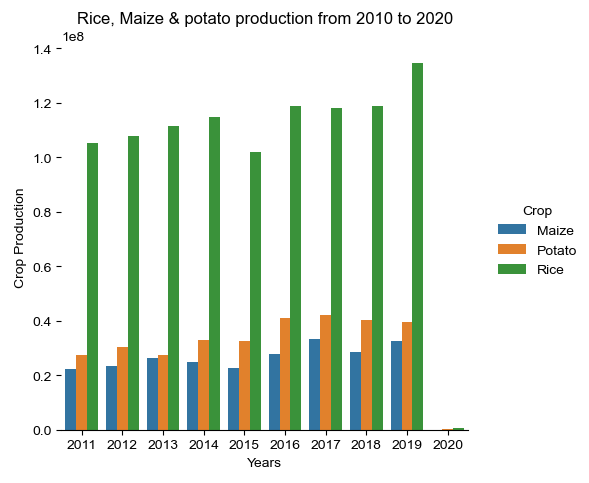

In [13]:
# Create plot
g = sns.catplot(y="Production", x = "Crop_Year", hue="Crop" , data= result_df, kind = "bar" )
sns.set(rc={'figure.figsize':(100,100)})
g.set_axis_labels("Years", "Crop Production")
g.despine(left=True)
plt.title("Rice, Maize & potato production from 2010 to 2020", loc = "center")
g.tight_layout()

In [14]:
# Create dataframe to plot production in different season
season_year_df = narrow_year_df.groupby(["Crop_Year","Season"])['Production'].sum().reset_index()
season_year_df.head()

,Crop_Year,Season,Production
0,2011,Autumn,3.631569e+06
1,2011,Kharif,2.947674e+08
2,2011,Rabi,1.604484e+08
3,2011,Summer,1.158406e+07
4,2011,Whole Year,1.889972e+10


In [15]:
# Creating another dataFrame using crop year, season and production
# without_wholeyear_df = narrow_year_df[narrow_year_df['Season']]
# without_wholeyear_df 

# Season_year_df = narrow_year_df.groupby(['Crop_Year','Season'])['Production'].sum().reset_index()
# Season_year_df.head()

In [16]:
# option1 = ['Autumn','Kharif','Rabi','Summer','Whole Year']
# temp =Season_year_df[Season_year_df["Season"].isin(option1)].reset_index()
# temp.head()
# # option = ["Rice","Maize","Potato"]
# result_df = crop_year_df[crop_year_df["Crop"].isin(option)].reset_index()

c:\Users\rajit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rajit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rajit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\rajit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

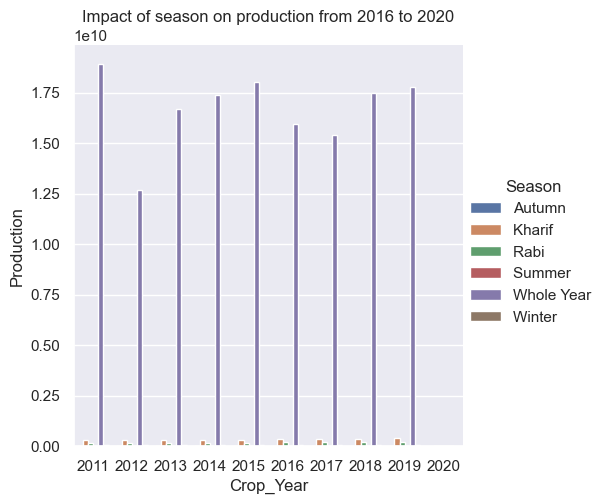

In [17]:
# Create plot
s = sns.catplot(y="Production", x = "Crop_Year", hue="Season" , data= season_year_df, kind = "bar" )
sns.set(rc={'figure.figsize':(100,100)})
g.set_axis_labels("Years", "Crop Production")
g.despine(left=True)
plt.title("Impact of season on production from 2016 to 2020", loc = "center")
g.tight_layout()